In [1]:
pip install pandas scipy statsmodels

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Import libraries
import pandas as pd
from scipy import stats
import numpy as np
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


# Preprocessing

In [8]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 400    │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃    ┃      ┃          ┃        ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ e          ┃ NA ┃ NA % ┃ mean     ┃ sd     ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ User ID    │  0 │    0 │ 15690000 │  71660 │ 15570000 │ 15630000 │ 15690000 │ 15750000 │ 15820000 │ ▇▆▇▇▇▇ │  │
│ │ Age        │  0 │    0 │    37.66 │  10.48 │       18 │    29.75 │       37 │       46 │       60 │ ▃▆▇▆▅▃ │  │
│ │ EstimatedS │  0 │    0 │    69740 │  34100 │    15000 │    43000 │    70000 │    88000 │   150000 │ ▆▆▇▃▂▂ │  │
│ │ alary      │    │      │          │        │          │          │          │          │          │        │  │
│ │ Purchased  │  0 │    0 │   0.3575 │ 0.4799 │        0 │        0 │        0 │        1 │        1 │ ▇    ▅ │  │
│ └────────────┴────┴──────┴──────────┴────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                    │       0 │          0 │                            1 │                      400 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [9]:
df.shape

(400, 5)

In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Exploratort Data Analysis(EDA)

C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gender', ylabel='Count'>

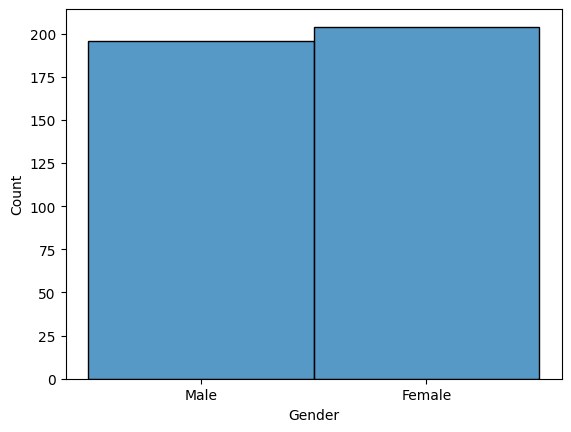

In [14]:
sns.histplot(df["Gender"])

C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


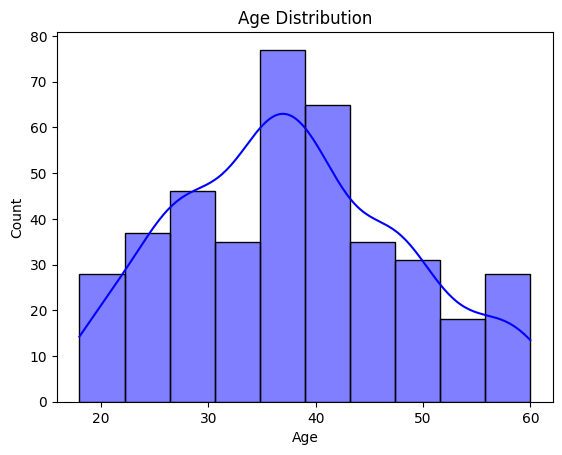

In [19]:
# Visualize distributions of numerical variables
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

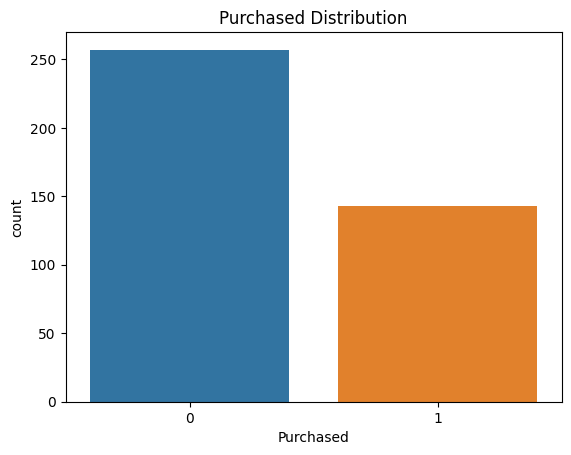

In [20]:
sns.countplot(x='Purchased', data=df)
plt.title('Purchased Distribution')
plt.show()

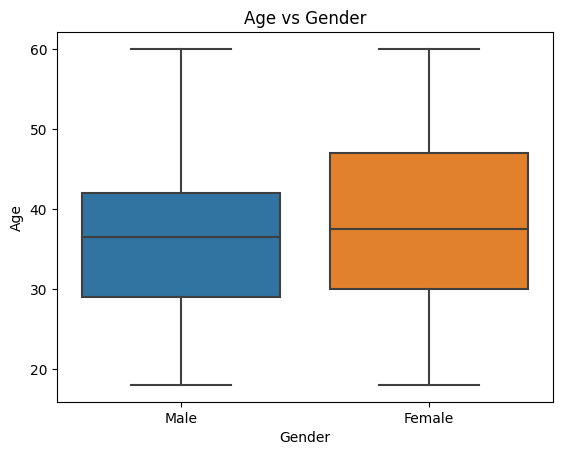

In [21]:
#Visualize relationships
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age vs Gender')
plt.show()

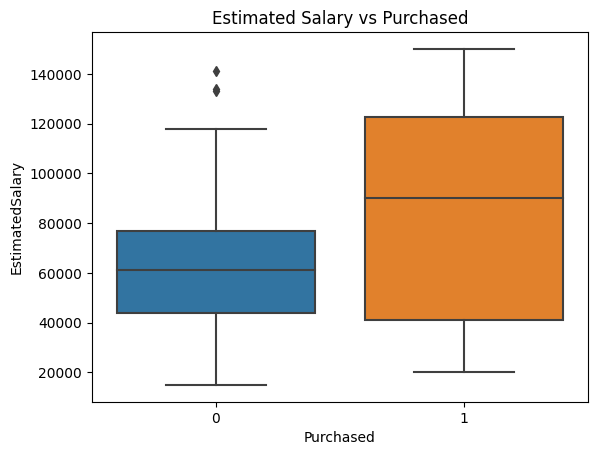

In [22]:
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df)
plt.title('Estimated Salary vs Purchased')
plt.show()


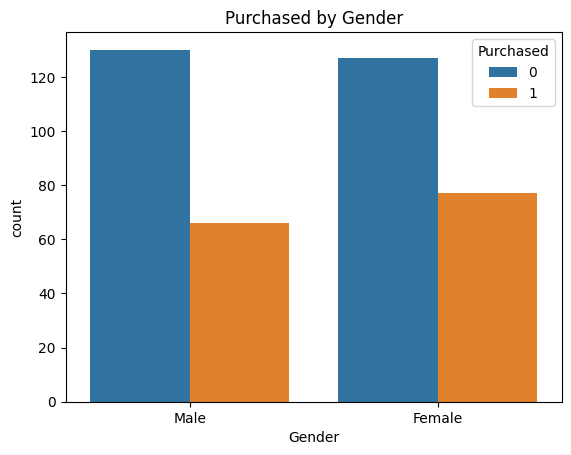

In [23]:
#Categorical variable analysis
sns.countplot(x='Gender', hue='Purchased', data=df)
plt.title('Purchased by Gender')
plt.show()

### Step 1: Basic analysis 

In [28]:
df.groupby('Gender')['Purchased']

In [26]:
#'Purchased' is the binary outcome (1 = purchased, 0 = not purchased).
#Group the data by 'Gender' and calculate the purchase rate for each gender
purchase_rate_by_gender = df.groupby('Gender')['Purchased'].mean()
purchase_rate_by_gender


Gender
Female    0.377451
Male      0.336735
Name: Purchased, dtype: float64

In [39]:
#Step 2: Number of males and females in each group
gender_summary = df.groupby('Gender')['Purchased'].agg(['count', 'sum'])

In [40]:
gender_summary

,count,sum
Gender,,
Female,204,77
Male,196,66


In [41]:
# Step 3: Perform a hypothesis test - Z-test for proportions
# Null Hypothesis (H0): The purchase rate is the same for both groups
# Alternative Hypothesis (H1): The purchase rate is different for both groups


In [44]:
#Separate the 'Purchased' data for each gender into two groups (A = Male, B = Female)
purchases_male = df[df['Gender'] == 'Male']['Purchased'].sum()
purchases_female = df[df['Gender'] == 'Female']['Purchased'].sum()

In [45]:
purchases_male

66

In [46]:
df[df['Gender'] == 'Male']

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
8,15600575,Male,25,33000,0
...,...,...,...,...,...
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
393,15635893,Male,60,42000,1
396,15706071,Male,51,23000,1


In [49]:
n_male = df[df['Gender'] == 'Male']['Purchased'].count()

In [50]:
n_male

196

In [51]:
n_female = df[df['Gender'] == 'Female']['Purchased'].count()

In [53]:
n_female

204

In [56]:
#Rates
p_male = purchases_male/n_male
p_female = purchases_female/n_female

In [57]:
p_male

0.336734693877551

In [59]:
p_female

0.37745098039215685

In [61]:
# Pooled probability 
p_pool = (purchases_male + purchases_female) / (n_male + n_female)

In [62]:
p_pool

0.3575

In [63]:
# Standard error of the difference between the two proportions
SE = np.sqrt(p_pool * (1 - p_pool) * (1/n_male + 1/n_female))

In [64]:
SE

0.04793596397963707

In [ ]:
#Perform an independent z-test for proportions
# Since 'Purchased' is a binary outcome, we can use a proportions test to compare the two groups

In [65]:
# Z-score calculation
z_score = (p_male - p_female) / SE

In [66]:
z_score

-0.8493891252901871

In [67]:
# Calculate p-value from z-score
p_value = stats.norm.sf(abs(z_score)) * 2  # Two-tailed test


In [68]:
p_value

0.3956648022875956

In [70]:
print(f"\nZ-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")


Z-score: -0.85
P-value: 0.3957


In [73]:
# Step 4: Conclusion
alpha = 0.05  # significance level
if p_value < alpha:
    print("\nReject the null hypothesis:  There is a significant difference between the purchase rates of males and females.")
else:
   print("\nFail to reject the null hypothesis: ")


Fail to reject the null hypothesis: The purchase rate is the different for both groups
